In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
exc = pd.read_csv(r"C:\Users\user1\Documents\python\Python for Data Science\python libraries\Pandas\Pandas Exercises\pandas_project\excellent.csv")

In [81]:
exc.head(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [9]:
# exc.sort_values("Item_Store_Returns")[["Store_Location_Type","Store_Type", "Item_Type"]]

,Store_Location_Type,Store_Type,Item_Type
4702,Cluster 3,Grocery Store,Household
337,Cluster 3,Grocery Store,Soft Drinks
2499,Cluster 3,Grocery Store,Breads
2819,Cluster 3,Grocery Store,Frozen Foods
4962,Cluster 3,Grocery Store,Health and Hygiene
...,...,...,...
1562,Cluster 3,Supermarket Type3,Canned
2348,Cluster 3,Supermarket Type3,Snack Foods
3897,Cluster 3,Supermarket Type3,Fruits and Vegetables
2433,Cluster 3,Supermarket Type3,Fruits and Vegetables


In [129]:
do = exc.groupby(["Store_Type", "Store_Location_Type"])[["Item_Store_Returns"]].sum().reset_index()
do

,Store_Type,Store_Location_Type,Item_Store_Returns
0,Grocery Store,Cluster 1,357844.32
1,Grocery Store,Cluster 3,240638.60
2,Supermarket Type1,Cluster 1,6880331.05
3,Supermarket Type1,Cluster 2,11996341.95
4,Supermarket Type1,Cluster 3,2407829.22
5,Supermarket Type2,Cluster 3,2770310.84
6,Supermarket Type3,Cluster 3,5803269.64


<AxesSubplot:xlabel='Store_Type', ylabel='Item_Store_Returns'>

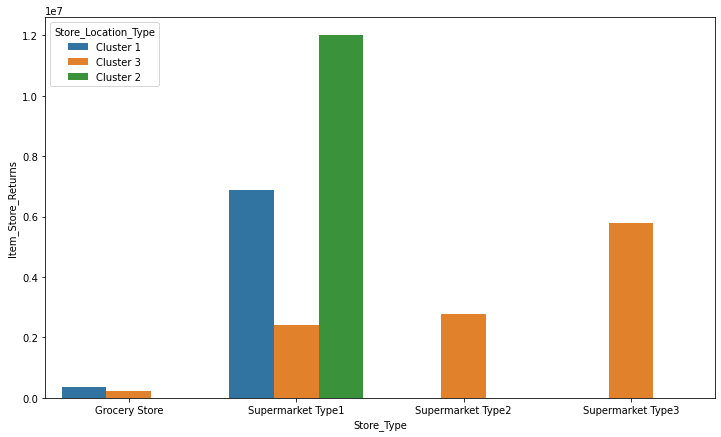

In [130]:
plt.figure(figsize=(12,7))
sns.barplot(x='Store_Type', y='Item_Store_Returns', hue='Store_Location_Type', data=do)
# plt.bar(x="Store_Type", height="Item_Store_Returns", data=exc)

In [78]:
typesort = exc.groupby("Store_Type")[["Item_Store_Returns"]].sum().sort_values("Item_Store_Returns", ascending=False).reset_index()
typesort

,Store_Type,Item_Store_Returns
0,Supermarket Type1,21284502.22
1,Supermarket Type3,5803269.64
2,Supermarket Type2,2770310.84
3,Grocery Store,598482.92


<AxesSubplot:xlabel='Store_Type', ylabel='Item_Store_Returns'>

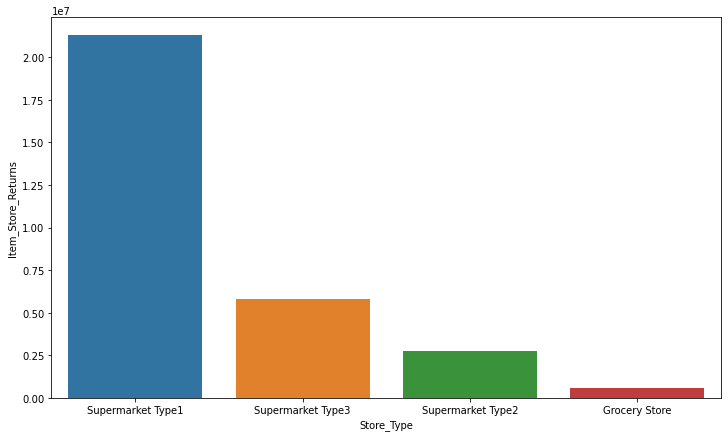

In [80]:
plt.figure(figsize=(12,7))
sns.barplot(x="Store_Type", y="Item_Store_Returns", data=typesort)

In [84]:
clustersort = exc.groupby("Store_Location_Type")[["Item_Store_Returns"]].sum().sort_values("Item_Store_Returns", ascending=False).reset_index()
clustersort

,Store_Location_Type,Item_Store_Returns
0,Cluster 2,11996341.95
1,Cluster 3,11222048.30
2,Cluster 1,7238175.37


<AxesSubplot:xlabel='Store_Location_Type', ylabel='Item_Store_Returns'>

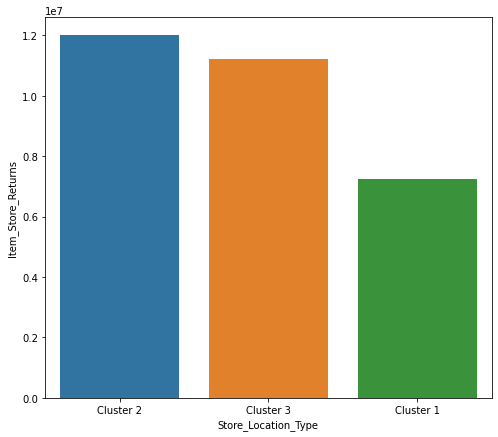

In [86]:
plt.figure(figsize=(8,7))
sns.barplot(x="Store_Location_Type", y="Item_Store_Returns", data=clustersort)

In [22]:
cl2 = exc[exc["Store_Location_Type"] == "Cluster 2"]
cl2

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,BABATUNJI045,DRA12_BABATUNJI045,11.60,Low Sugar,0.000000,Soft Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54
8,DRA24,BABATUNJI017,DRA24_BABATUNJI017,19.35,Normal Sugar,0.040154,Soft Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27
11,DRA24,BABATUNJI035,DRA24_BABATUNJI035,19.35,Normal Sugar,0.039921,Soft Drinks,408.47,2011,Small,Cluster 2,Supermarket Type1,8598.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,NCZ41,BABATUNJI017,NCZ41_BABATUNJI017,19.85,Low Sugar,0.064786,Health and Hygiene,309.43,2014,NaN,Cluster 2,Supermarket Type1,6258.52
4977,NCZ41,BABATUNJI035,NCZ41_BABATUNJI035,19.85,Low Sugar,0.064409,Health and Hygiene,316.93,2011,Small,Cluster 2,Supermarket Type1,4380.96
4978,NCZ42,BABATUNJI017,NCZ42_BABATUNJI017,10.50,Low Sugar,0.011352,Household,591.31,2014,NaN,Cluster 2,Supermarket Type1,10073.55
4979,NCZ42,BABATUNJI035,NCZ42_BABATUNJI035,10.50,Low Sugar,0.011286,Household,589.56,2011,Small,Cluster 2,Supermarket Type1,10666.12


In [23]:
cl3 = exc[exc["Store_Location_Type"] == "Cluster 3"]
cl3

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
6,DRA24,BABATUNJI010,DRA24_BABATUNJI010,19.35,Normal Sugar,0.066832,Soft Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93
7,DRA24,BABATUNJI013,DRA24_BABATUNJI013,19.35,Normal Sugar,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,NCZ53,BABATUNJI018,NCZ53_BABATUNJI018,9.60,Low Sugar,0.024577,Health and Hygiene,466.55,2016,Medium,Cluster 3,Supermarket Type2,4710.54
4981,NCZ53,BABATUNJI027,NCZ53_BABATUNJI027,NaN,Low Sugar,0.024359,Health and Hygiene,476.05,1992,Medium,Cluster 3,Supermarket Type3,14131.61
4983,NCZ54,BABATUNJI010,NCZ54_BABATUNJI010,14.65,Low Sugar,0.000000,Household,403.89,2005,NaN,Cluster 3,Grocery Store,812.28
4984,NCZ54,BABATUNJI018,NCZ54_BABATUNJI018,14.65,Low Sugar,0.083699,Household,408.64,2016,Medium,Cluster 3,Supermarket Type2,6498.21


In [96]:
# exc[exc["Item_Store_Returns"] == exc["Item_Store_Returns"].max()]
cl2_itemtype_grp = cl2.groupby("Item_Type").sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index()
cl2_itemtype_grp

,Item_Type,Item_Store_Returns
0,Snack Foods,1834971.57
1,Fruits and Vegetables,1829210.72
2,Household,1405242.59
3,Frozen Foods,1158172.43
4,Canned,964681.02
5,Dairy,948227.42
6,Baking Goods,694063.28
7,Soft Drinks,630773.97
8,Health and Hygiene,595205.30
9,Meat,547876.84


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Store_Returns'>

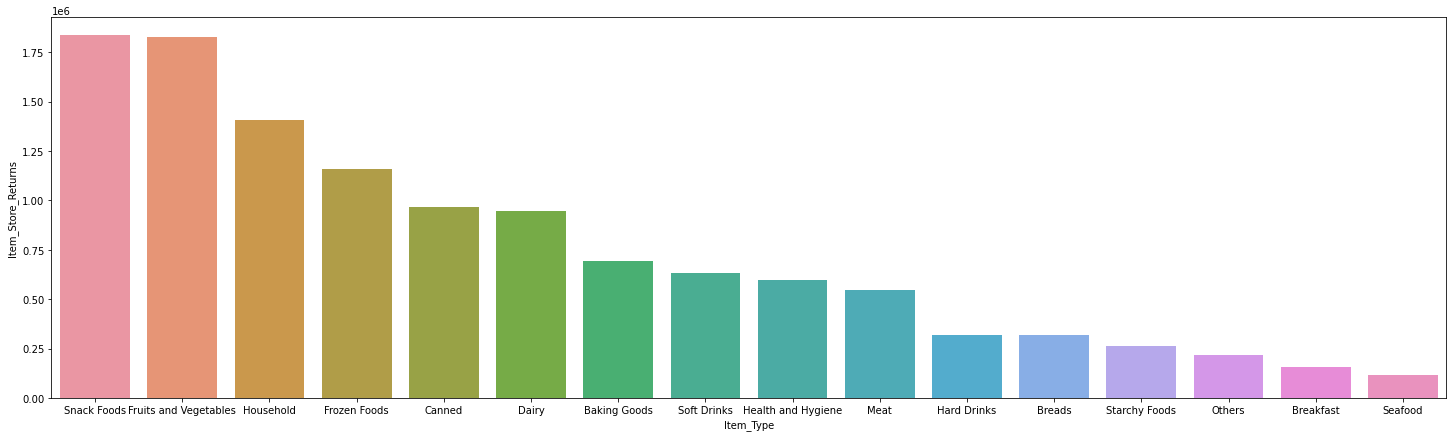

In [93]:
plt.figure(figsize=(25,7))
sns.barplot(x="Item_Type", y="Item_Store_Returns", data=cl2_itemtype_grp)

In [68]:
cl2_itemid_grp = cl2.groupby(["Item_ID","Item_Type"]).sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index()
cl2_itemid_grp.head()

,Item_ID,Item_Type,Item_Store_Returns
0,FDA15,Dairy,46066.70
1,FDT21,Snack Foods,44821.65
2,FDG45,Fruits and Vegetables,44070.97
3,FDB11,Starchy Foods,39382.07
4,DRJ51,Dairy,37434.61


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Store_Returns'>

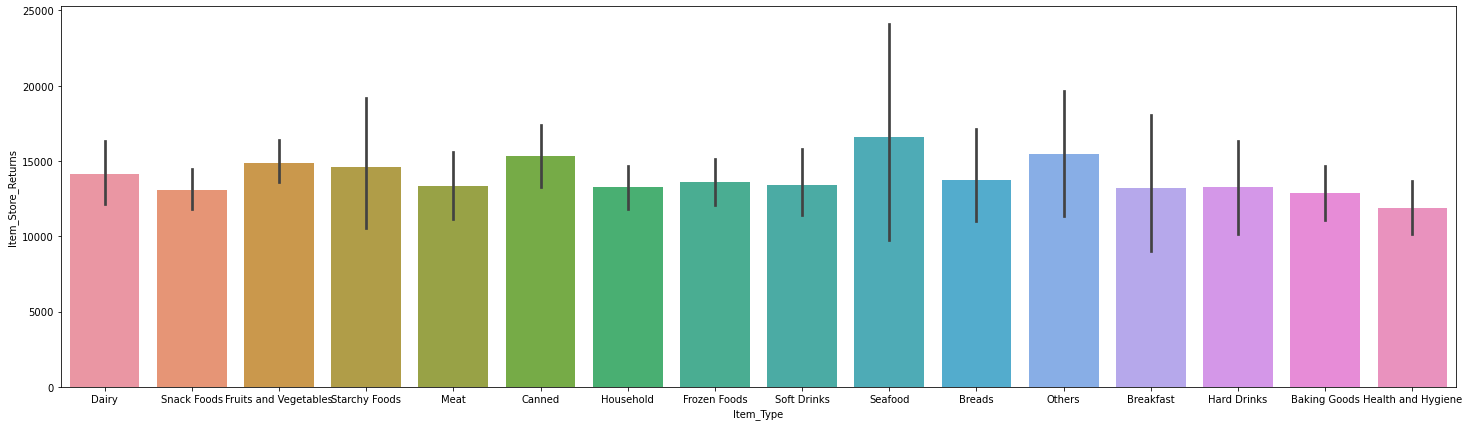

In [94]:
plt.figure(figsize=(25,7))
sns.barplot(x="Item_Type", y="Item_Store_Returns", data=cl2_itemid_grp)

In [98]:
cl2[cl2["Item_ID"] == 'FDA15']

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
501,FDA15,BABATUNJI017,FDA15_BABATUNJI017,9.3,Ultra Low Sugar,0.016113,Dairy,622.02,2014,NaN,Cluster 2,Supermarket Type1,14940.55
503,FDA15,BABATUNJI035,FDA15_BABATUNJI035,9.3,Low Sugar,0.016019,Dairy,621.27,2011,Small,Cluster 2,Supermarket Type1,16185.60
504,FDA15,BABATUNJI045,FDA15_BABATUNJI045,9.3,Low Sugar,0.016055,Dairy,625.52,2009,NaN,Cluster 2,Supermarket Type1,14940.55


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Store_Returns'>

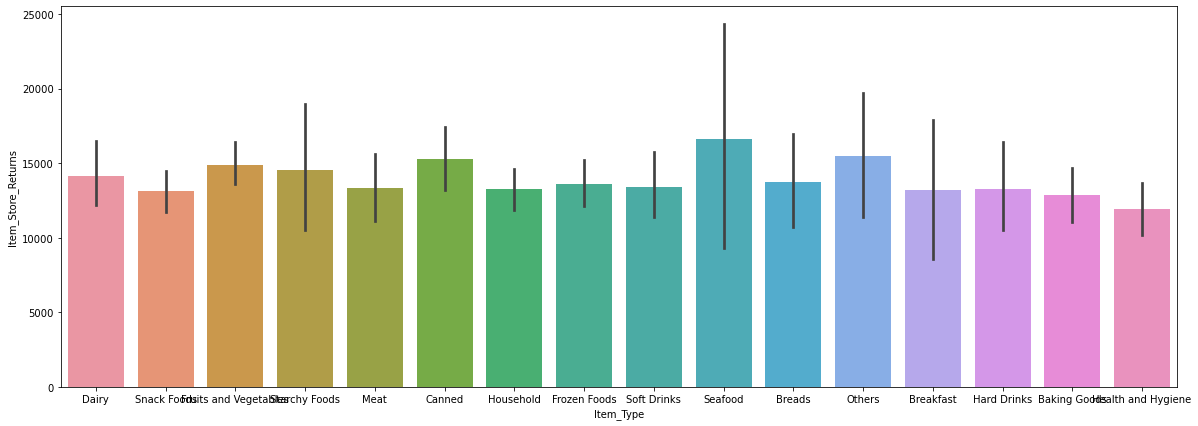

In [72]:
plt.figure(figsize=(20,7))
sns.barplot(x="Item_Type", 
            y="Item_Store_Returns", 
            data=cl2_itemid_grp)

In [99]:
# exc[exc["Item_Store_Returns"] == exc["Item_Store_Returns"].max()]
all_itemtype_grp = exc.groupby("Item_Type").sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index()
all_itemtype_grp

,Item_Type,Item_Store_Returns
0,Fruits and Vegetables,4753680.69
1,Snack Foods,4744323.12
2,Household,3488712.43
3,Frozen Foods,2750915.93
4,Canned,2334080.29
5,Dairy,2173104.79
6,Baking Goods,1944151.22
7,Health and Hygiene,1657208.00
8,Meat,1606164.39
9,Soft Drinks,1573069.09


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Store_Returns'>

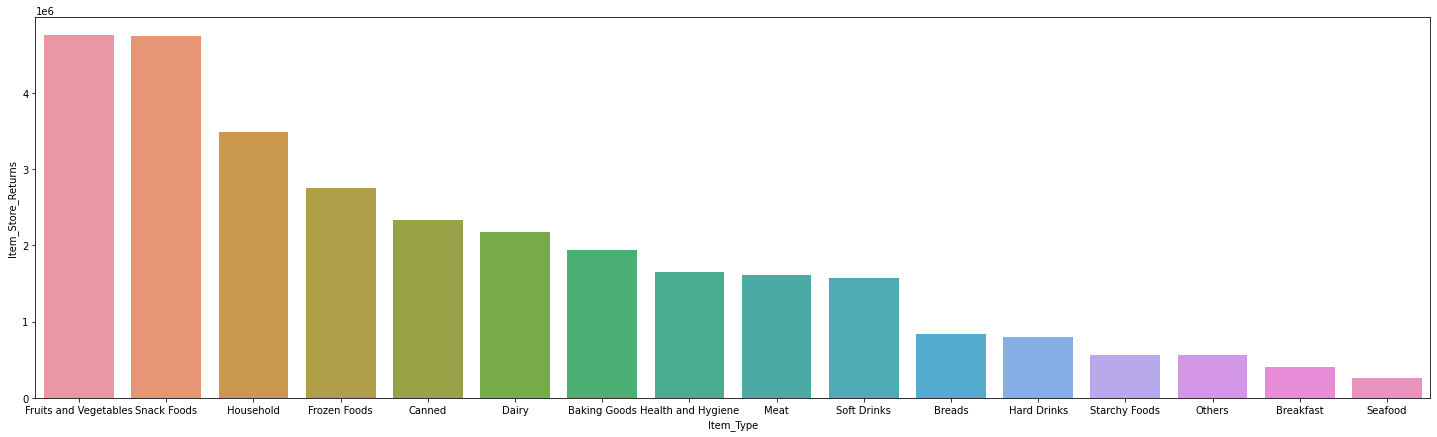

In [100]:
plt.figure(figsize=(25,7))
sns.barplot(x="Item_Type", y="Item_Store_Returns", data=all_itemtype_grp)

In [101]:
all_itemid_grp = exc.groupby(["Item_ID","Item_Type"]).sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index()
all_itemid_grp.head()

,Item_ID,Item_Type,Item_Store_Returns
0,FDT55,Fruits and Vegetables,67457.20
1,FDE16,Frozen Foods,67207.51
2,DRF36,Soft Drinks,66879.61
3,FDW56,Fruits and Vegetables,66864.63
4,NCL31,Others,65847.64


In [105]:
exc[exc["Item_ID"] == "FDT55"].head(1)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
3011,FDT55,BABATUNJI013,FDT55_BABATUNJI013,13.6,Normal Sugar,0.043619,Fruits and Vegetables,391.99,1994,High,Cluster 3,Supermarket Type1,7100.76


In [131]:
cl3_itemtype = cl3.groupby("Item_Type").sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index().head(4)
cl3_itemtype


,Item_Type,Item_Store_Returns
0,Fruits and Vegetables,1795727.60
1,Snack Foods,1771960.27
2,Household,1272705.07
3,Frozen Foods,984581.82


In [112]:
cl3_storetype = cl3.groupby(["Store_Type"]).sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index()
cl3_storetype

,Store_Type,Item_Store_Returns
0,Supermarket Type3,5803269.64
1,Supermarket Type2,2770310.84
2,Supermarket Type1,2407829.22
3,Grocery Store,240638.60


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Store_Returns'>

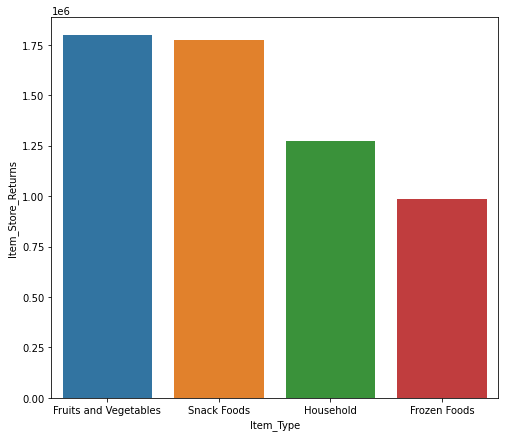

In [133]:
plt.figure(figsize=(8,7))
sns.barplot(x="Item_Type", y="Item_Store_Returns", data=cl3_itemtype)

<AxesSubplot:xlabel='Store_Type', ylabel='Item_Store_Returns'>

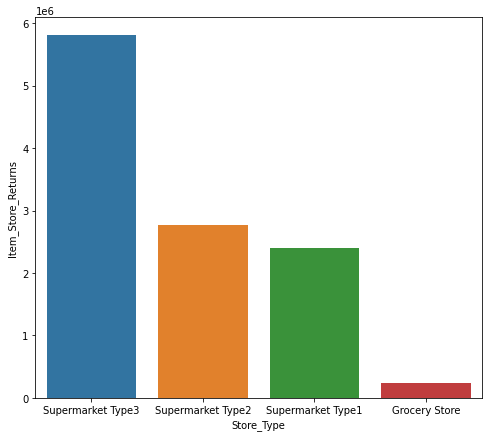

In [134]:
plt.figure(figsize=(8,7))
sns.barplot(x="Store_Type", y="Item_Store_Returns", data=cl3_storetype)

In [45]:
cl3.groupby(["Item_ID","Item_Type"]).sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].head()

,,Item_Store_Returns
Item_ID,Item_Type,
DRF36,Soft Drinks,37261.50
FDW56,Fruits and Vegetables,33191.80
NCE42,Household,32717.41
DRE48,Soft Drinks,32517.67
FDJ21,Snack Foods,31349.19


In [47]:
cl3_s = cl3[cl3['Store_Type']=='Supermarket Type3']
cl3_s.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
10,DRA24,BABATUNJI027,DRA24_BABATUNJI027,NaN,Normal Sugar,0.039735,Soft Drinks,414.47,1992,Medium,Cluster 3,Supermarket Type3,12284.01
16,DRA59,BABATUNJI027,DRA59_BABATUNJI027,NaN,Normal Sugar,0.127308,Soft Drinks,466.73,1992,Medium,Cluster 3,Supermarket Type3,17583.78
19,DRB01,BABATUNJI027,DRB01_BABATUNJI027,NaN,Low Sugar,0.081841,Soft Drinks,475.13,1992,Medium,Cluster 3,Supermarket Type3,1423.15
48,DRC36,BABATUNJI027,DRC36_BABATUNJI027,NaN,Normal Sugar,0.044767,Soft Drinks,434.26,1992,Medium,Cluster 3,Supermarket Type3,14446.20
51,DRC49,BABATUNJI027,DRC49_BABATUNJI027,NaN,Ultra Low Sugar,0.065120,Soft Drinks,364.28,1992,Medium,Cluster 3,Supermarket Type3,10066.90


# starts here

In [52]:
cl3_s.groupby("Item_Type").sum()[["Item_Store_Returns"]].head(2)

,Item_Store_Returns
Item_Type,
Baking Goods,330098.69
Breads,167342.17


In [53]:
cl3_s.groupby("Item_ID").sum()[["Item_Store_Returns"]].head(2)

,Item_Store_Returns
Item_ID,
DRA24,12284.01
DRA59,17583.78


In [118]:
sp3 = exc[exc["Store_Type"] == "Supermarket Type3"]

In [139]:
sp3_itemtype = sp3.groupby(["Item_Type"]).sum().sort_values("Item_Store_Returns", ascending=False)[["Item_Store_Returns"]].reset_index().head()

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Store_Returns'>

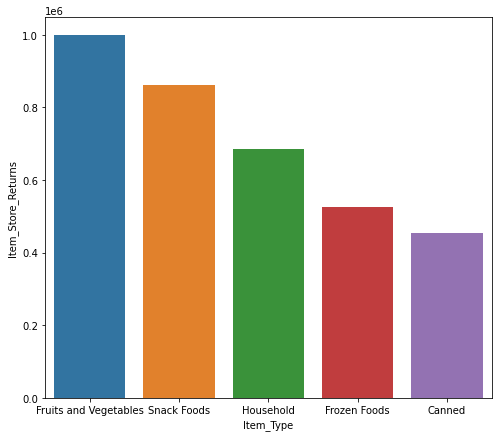

In [140]:
plt.figure(figsize=(8,7))
sns.barplot(x="Item_Type", y="Item_Store_Returns", data=sp3_itemtype)